## Imports: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pickle

#### Note two environments were used for this project, one environment for preprocessing and another for classification, due to some incompatibilities with keras x SMOTE.

## Loading database:
### database that considers several factors such as: profession, location, hours worked, gender, age to determine whether the person's income is above 50k or below 50k.

In [2]:
census_base =  pd.read_csv('census.csv')

## Analyzing the database

In [3]:
census_base.shape

(32561, 15)

In [4]:
census_base.head(5)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
np.unique(census_base['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

### Of the 32561 people in this database:
#### 24.720 people earn below 50k
#### 7.841 people earn over 50k
#### this database is unbalanced

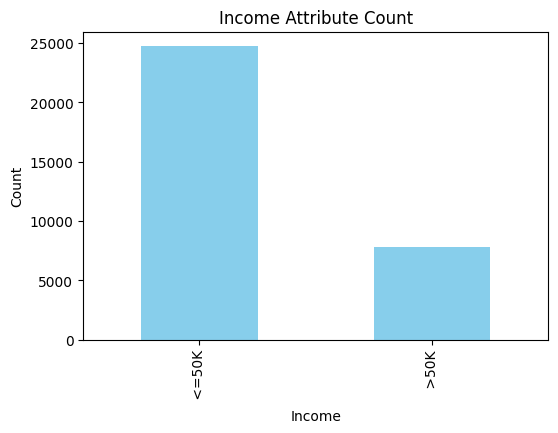

In [6]:
plt.figure(figsize=(6, 4)) 
census_base['income'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Income Attribute Count')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

### Setting up training and testing bases, balancing classifier data, and treating categorical data

In [7]:
X_census = census_base.iloc[:, 0:14].values

In [8]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [9]:
y_census = census_base.iloc[:, 14].values

In [10]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### LabelEncoder

In [11]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_maritalstatus = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_nativecountry = LabelEncoder()

In [12]:
X_census[:, 1] = label_encoder_workclass.fit_transform(X_census[:, 1])
X_census[:, 3] = label_encoder_education.fit_transform(X_census[:, 3])
X_census[:, 5] = label_encoder_maritalstatus.fit_transform(X_census[:, 5])
X_census[:, 6] = label_encoder_occupation.fit_transform(X_census[:, 6])
X_census[:, 7] = label_encoder_relationship.fit_transform(X_census[:, 7])
X_census[:, 8] = label_encoder_race.fit_transform(X_census[:, 8])
X_census[:, 9] = label_encoder_sex.fit_transform(X_census[:, 9])
X_census[:, 13] = label_encoder_nativecountry.fit_transform(X_census[:, 13])

In [13]:
y_census = y_census.reshape(-1,1)
label_encoder_income = LabelEncoder()
y_census[:, 0] = label_encoder_income.fit_transform(y_census[:, 0])


### Normalizing classifier data for keras/tensorflow

In [14]:
y_census

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=object)

In [15]:
y_census = y_census.ravel()

In [16]:
y_census = y_census.astype(float)
y_census

array([0., 0., 0., ..., 0., 0., 1.])

#### <=50K = 0
#### >50K = 1

### Applying Oversampling with SMOTE:

In [17]:
smote = SMOTE(sampling_strategy='minority')

In [18]:
X_census.shape, y_census.shape

((32561, 14), (32561,))

In [19]:
X_census, y_census = smote.fit_resample(X_census, y_census)

In [20]:
X_census.shape, y_census.shape

((49440, 14), (49440,))

### Original base

In [21]:
np.unique(census_base['income'], return_counts=True)

(array([0, 1], dtype=object), array([24720,  7841], dtype=int64))

### New base

In [22]:
np.unique(y_census, return_counts=True)

(array([0., 1.]), array([24720, 24720], dtype=int64))

## OneHotEncoder

In [23]:
onehotencoder = ColumnTransformer(
    transformers=[('OneHot', OneHotEncoder(), 
                  [1, 3, 5, 6, 7, 8, 9, 13]
                  )], 
    remainder='passthrough'
)
X_census = onehotencoder.fit_transform(X_census).toarray()

In [24]:
X_census.shape, y_census.shape

((49440, 57613), (49440,))

## Stardard Scaler

In [25]:
X_scaler = StandardScaler()
X_census = X_scaler.fit_transform(X_census)
X_census

array([[-0.19666541, -0.00449744, -0.00449744, ...,  0.00790781,
        -0.25454378, -0.18752092],
       [-0.19666541, -0.00449744, -0.00449744, ..., -0.19626062,
        -0.25454378, -2.52784083],
       [-0.19666541, -0.00449744, -0.00449744, ..., -0.19626062,
        -0.25454378, -0.18752092],
       ...,
       [-0.19666541, -0.00449744, -0.00449744, ..., -0.19626062,
        -0.25454378, -0.18752092],
       [-0.19666541, -0.00449744, -0.00449744, ..., -0.19626062,
        -0.25454378,  0.53188218],
       [-0.19666541, -0.00449744, -0.00449744, ..., -0.19626062,
        -0.25454378, -0.08169859]])

In [26]:
X_census.shape, y_census.shape

((49440, 57613), (49440,))

### Separating the bases for training and test:

In [27]:
X_training, X_test, y_training, y_test = train_test_split(X_census, y_census, 
                                                          test_size=0.15, 
                                                          random_state=0)

In [28]:
with open('pre_processed_census_database.pkl', mode='wb') as f :
    pickle.dump([X_training, y_training, X_test, y_test, X_scaler], f)